# Load the datasets from the run

## Tuner Runs

In [4]:
import pickle

import numpy as np

with open('data/iris_tuner_raw.pickle', 'rb') as f:
    all_results = pickle.load(f)
    
# Collect max of every run

y_knn = []
y_svm = []
y_nn = []
y_dtree = []
y_xgboost = []

all_results_variation = []

    
for res in all_results:
    results_knn, results_svm, results_nn, results_dtree, results_xgboost = res
    
    results_obj_knn = np.array(results_knn['objective_values'])

    y_max_knn=[]
    for i in range(results_obj_knn.shape[0]):
        y_max_knn.append(np.max(results_obj_knn[:i+2]))


    results_obj_svm = np.array(results_svm['objective_values'])

    y_max_svm=[]
    for i in range(results_obj_svm.shape[0]):
        y_max_svm.append(np.max(results_obj_svm[:i+2]))



    results_obj_nn = np.array(results_nn['objective_values'])

    y_max_nn=[]
    for i in range(results_obj_nn.shape[0]):
        y_max_nn.append(np.max(results_obj_nn[:i+2]))



    results_obj_dtree = np.array(results_dtree['objective_values'])

    y_max_dtree=[]
    for i in range(results_obj_dtree.shape[0]):
        y_max_dtree.append(np.max(results_obj_dtree[:i+2]))


    results_obj_xgboost = np.array(results_xgboost['objective_values'])

    y_max_xgboost=[]
    for i in range(results_obj_xgboost.shape[0]):
        y_max_xgboost.append(np.max(results_obj_xgboost[:i+2]))
        
    results = [results_obj_knn, results_obj_svm, results_obj_nn, results_obj_dtree, y_max_xgboost]

    results = np.array(results)
    
    results_variation = []
    configs = []

    for i in range(results.shape[1]):
        max_val = np.max(results[:,:(i+2)])
        results_variation.append(max_val)
        configs.append((i)*results.shape[0])
    
    all_results_variation.append(results_variation)
    

configs_tuner = configs

In [5]:
all_results_variation = np.array(all_results_variation)
print(all_results_variation.shape)
avg_tuner = np.mean(all_results_variation,axis = 0)
min_tuner = np.min(all_results_variation,axis = 0)
max_tuner = np.max(all_results_variation,axis = 0)


(10, 42)


## MetaTuner Runs

In [6]:
with open('data/iris_metatuner_raw.pickle', 'rb') as f:
    objective_values = pickle.load(f)


    
objective_values = np.array(objective_values)

results_variation = []

for j in range(objective_values.shape[0]):
    values = []
    for i in range(objective_values.shape[1]-10):
        val = np.max(objective_values[j,:(i+10)])
        #print(j,i,val)
        values.append(val)
    
    results_variation.append(values)


all_results_variation = np.array(results_variation)

print(all_results_variation.shape)

avg_metatuner = np.mean(all_results_variation,axis = 0)
min_metatuner = np.min(all_results_variation,axis = 0)
max_metatuner = np.max(all_results_variation,axis = 0)

print(avg_metatuner.shape)

(5, 100)
(100,)


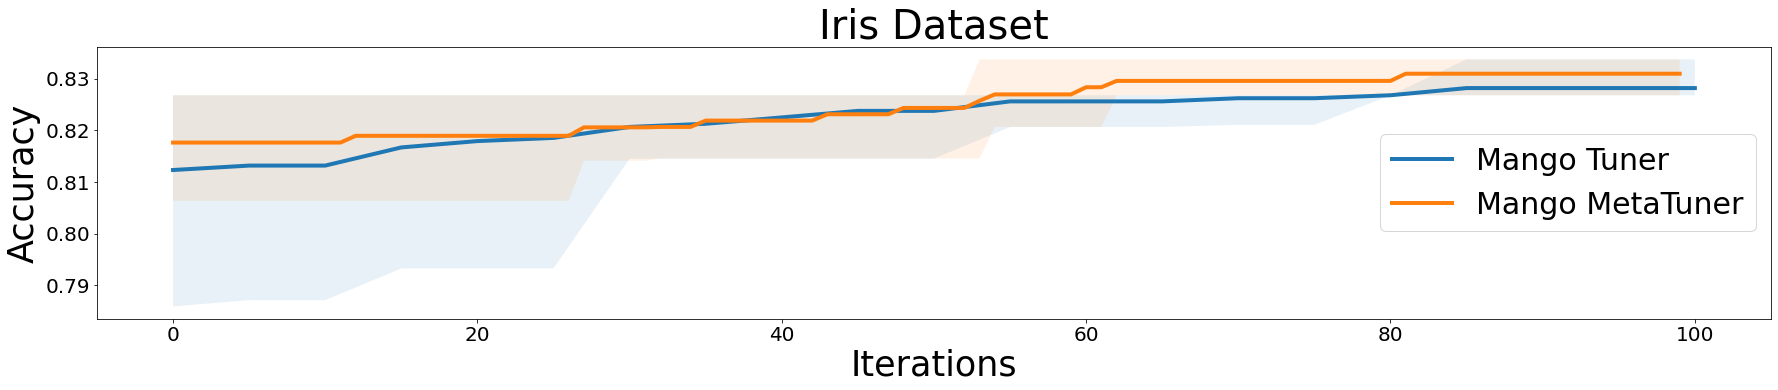

In [7]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Iris Dataset',fontsize=40)


plt.plot(configs_tuner[:21], avg_tuner[:21],lw=4,label='Mango Tuner')


configs_metatuner = [i for i in range(all_results_variation.shape[1])]
plt.plot(configs_metatuner, avg_metatuner,lw=4,label='Mango MetaTuner')



plt.fill_between(configs_tuner[:21], min_tuner[:21], max_tuner[:21], alpha=0.1)
plt.fill_between(configs_metatuner, min_metatuner, max_metatuner, alpha=0.1)



plt.xlabel('Iterations', fontsize=35)
plt.ylabel('Accuracy',fontsize=35)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='right',prop={'size': 30})
plt.show()